## 1. Introduction

Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash.People suffer non-fatal injuries, with many incurring a disability as a result of their injury.Road traffic injuries cause considerable economic losses to individuals, their families. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. It would be great to warn a person about the possibility in getting into an accident and how severe it would be, so that the person would drive more carefully or may change his/her travel if it's possible.Here, I have chosen 'car accident severity' dataset of Seattle, which has 'SEVERITYCODE' as it's target variable.

SEVERITYCODE has only two values i.e 1 or 2, where 1 implies 'Property Damage Only Collision' and 2 implies 'Injury Collision'.

Obviously, people will be interested in knowing whether there would be an accident or not. Police would be interested in knowing the probability of an accident to occur so that they can take steps to avoid crashes.

## 2.Data

Based on the objective, following factors may influence our decision:

1) Conditions of road, light, weather and driver's condition(is he inattention or under drugs/alcohol.

2) Vehicle's speed, condition.

3) Is area safer or not.

4) Is proper parking area alloted or not.

5) Are pedestrains given a way to walk,etc....

To examine factors that cause an accident I have chosen 'car accident severity' dataset. This dataset includes This includes all types of collisions from 2004 to present in Seattle which was provided within coursera.


### 2.1 DATA CLEANING

Typical data cleaning involves dealing with missing values, removing irrelevant data, ensuring data types.

In [2]:
import pandas as pd
df=pd.read_excel('Data-Collisions (1).xlsx')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df.shape

(194673, 38)

Implies our data set has 194673 samples with 38 attributes.

In [3]:
#on removing reduntant data
x=df[['ADDRTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','INATTENTIONIND', 'UNDERINFL', 'WEATHER','ROADCOND', 'LIGHTCOND','PEDROWNOTGRNT', 'SPEEDING','HITPARKEDCAR']]
y=df[['SEVERITYCODE']]

#### Dealing with missing values:

In [4]:
missing_data = x.isnull()
missing_data.head(5)

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,True,False,False,False,False,True,True,False
1,False,False,False,False,False,True,False,False,False,False,True,True,False
2,False,False,False,False,False,True,False,False,False,False,True,True,False
3,False,False,False,False,False,True,False,False,False,False,True,True,False
4,False,False,False,False,False,True,False,False,False,False,True,True,False


In [5]:
for column in missing_data.columns.values:
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
True     190006
False      4667
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64



In [6]:
y['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Based on above data, the columns which have missing values are:

1)ADDRTYPE: 1926 missing data

2)INATTENTIONIND: 164868 missing data

3)UNDERINFL: 4884 missing data

4)WEATHER: 5081 missing data

5)ROADCOND: 5012 missing data

6)LIGHTCOND: 5170 missing data

7)PEDROWNOTGRNT: 190006 missing data

8)SPEEDING: 185340 missing data

From above observation, we can see that INATTENTIONIND, PEDROWNOTGRNT, SPEEDING though these were important factors we need to drop them as they have lots of missing data.

Other attribute's missing values are to be filled by either mean or frequency. As none of them are continuous numericals we can opt for frequency.

In [7]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [8]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

UNDERINFL attribute values need to be either 0/1 or N/Y. Hence, not including this as it's ambiguous.

In [9]:
x.drop(columns=['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'],inplace=True)
x.drop(columns=['UNDERINFL'],inplace=True)
x.head()

C:\Users\raj_p\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,2,0,0,2,Overcast,Wet,Daylight,N
1,Block,2,0,0,2,Raining,Wet,Dark - Street Lights On,N
2,Block,4,0,0,3,Overcast,Dry,Daylight,N
3,Block,3,0,0,3,Clear,Dry,Daylight,N
4,Intersection,2,0,0,2,Raining,Wet,Daylight,N


In [10]:
import numpy as np
x['ADDRTYPE'].replace(np.nan,df['ADDRTYPE'].value_counts().max(), inplace=True)
x['WEATHER'].replace(np.nan,df['WEATHER'].value_counts().max(), inplace=True)
x['ROADCOND'].replace(np.nan,df['ROADCOND'].value_counts().max(), inplace=True)
x['LIGHTCOND'].replace(np.nan,df['LIGHTCOND'].value_counts().max(), inplace=True)

x.head()


C:\Users\raj_p\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,2,0,0,2,Overcast,Wet,Daylight,N
1,Block,2,0,0,2,Raining,Wet,Dark - Street Lights On,N
2,Block,4,0,0,3,Overcast,Dry,Daylight,N
3,Block,3,0,0,3,Clear,Dry,Daylight,N
4,Intersection,2,0,0,2,Raining,Wet,Daylight,N


## 3 Data Analysis

Let's analyze which factors contribute to more number of accidents.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
for i in range(194673):
    if x.iloc[i]['ROADCOND']==124510:
        x.at[i,'ROADCOND']='Dry'

Text(0.5,1,'Road condition vs No of Accidents')

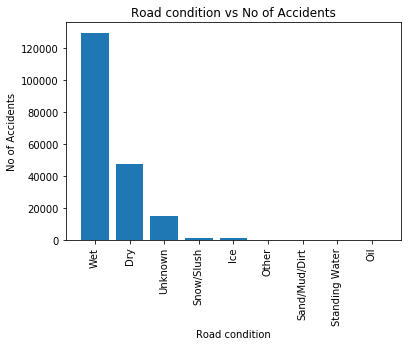

In [32]:
s=x.ROADCOND.unique()
d=x.ROADCOND.value_counts()
plt.bar(s,height=d)
plt.xlabel('Road condition')
plt.ylabel('No of Accidents')
plt.xticks(rotation=90)
plt.title('Road condition vs No of Accidents')

In [43]:
for i in range(194673):
    if x.iloc[i]['LIGHTCOND']==116137:
        x.at[i,'LIGHTCOND']='Daylight'
    if x.iloc[i]['WEATHER']==111135:
        x.at[i,'WEATHER']='Clear'

In [46]:
for i in range(194673):
    if df.iloc[i]['ADDRTYPE']==126926:
        df.at[i,'ADDRTYPE']='Block'

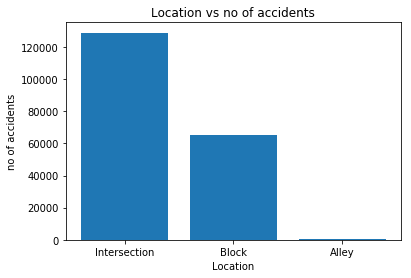

In [48]:
s=df.ADDRTYPE.unique()
d=df.ADDRTYPE.value_counts()
plt.bar(s,height=d)
plt.xlabel('Location')
plt.ylabel('no of accidents')
plt.title('Location vs no of accidents')
plt.show()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

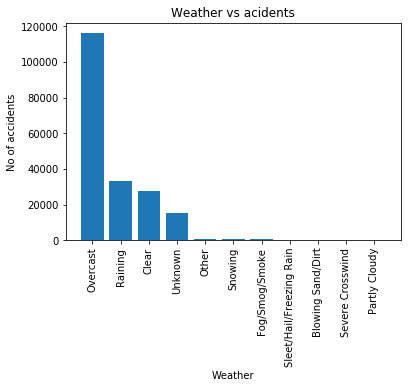

In [50]:
s=x.WEATHER.unique()
d=x.WEATHER.value_counts()
plt.bar(s,height=d)
plt.xlabel('Weather')
plt.ylabel('No of accidents')
plt.title('Weather vs acidents')
plt.xticks(rotation=90)

Text(0.5,1,'light condition vs No of Accidents')

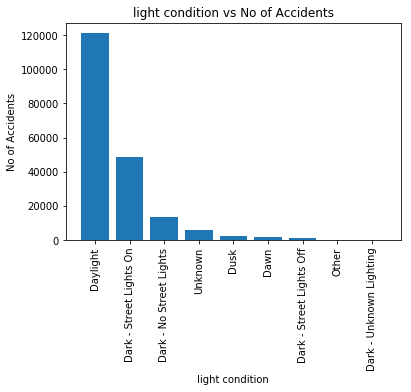

In [52]:
s=x.LIGHTCOND.unique()
d=x.LIGHTCOND.value_counts()
plt.bar(s,height=d)
plt.xlabel('light condition')
plt.ylabel('No of Accidents')
plt.xticks(rotation=90)
plt.title('light condition vs No of Accidents')

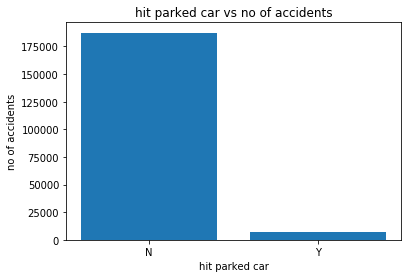

In [54]:
s=df.HITPARKEDCAR.unique()
d=df.HITPARKEDCAR.value_counts()
plt.bar(s,height=d)
plt.xlabel('hit parked car')
plt.ylabel('no of accidents')
plt.title('hit parked car vs no of accidents')
plt.show()

In [55]:
x.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,2,0,0,2,Overcast,Wet,Daylight,N
1,Block,2,0,0,2,Raining,Wet,Dark - Street Lights On,N
2,Block,4,0,0,3,Overcast,Dry,Daylight,N
3,Block,3,0,0,3,Clear,Dry,Daylight,N
4,Intersection,2,0,0,2,Raining,Wet,Daylight,N


In [56]:
x['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

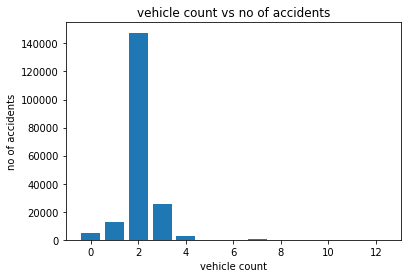

In [103]:
s=df.VEHCOUNT.unique()
d=df.VEHCOUNT.value_counts()
plt.bar(s,height=d)
plt.xlabel('vehicle count')
plt.ylabel('no of accidents')
plt.title('vehicle count vs no of accidents')
plt.show()

In [78]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


## 4.Data Modelling

In [64]:
x.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,2,0,0,2,Overcast,Wet,Daylight,N
1,Block,2,0,0,2,Raining,Wet,Dark - Street Lights On,N
2,Block,4,0,0,3,Overcast,Dry,Daylight,N
3,Block,3,0,0,3,Clear,Dry,Daylight,N
4,Intersection,2,0,0,2,Raining,Wet,Daylight,N


In [67]:
df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SEVERITYCODE']].corr()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYCODE
PERSONCOUNT,1.000000,-0.023464,-0.038809,0.380523,0.130949
PEDCOUNT,-0.023464,1.000000,-0.016920,-0.261285,0.246338
PEDCYLCOUNT,-0.038809,-0.016920,1.000000,-0.253773,0.214218
VEHCOUNT,0.380523,-0.261285,-0.253773,1.000000,-0.054686
SEVERITYCODE,0.130949,0.246338,0.214218,-0.054686,1.000000


We can observe that no considerable co-relation exists.

In [93]:
from sklearn import preprocessing
X = pd.get_dummies(x, columns=['WEATHER', 'LIGHTCOND', 'ROADCOND','ADDRTYPE','HITPARKEDCAR'], drop_first=True)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))
X[0:5]

array([[-0.36892023, -0.23821981, -0.21292395,  0.14330347, -1.24471313,
        -0.05455447, -0.06008705,  2.43225934, -0.00605272, -0.46312488,
        -0.01099577, -0.02406561, -0.06458818, -0.25112248, -0.07748236,
        -0.57632658, -0.0069012 , -0.11618936,  0.75112014, -0.18005782,
        -0.03398979, -0.23467146, -0.07586286, -0.01895106, -0.02590083,
        -0.01942867, -0.06752523, -0.02336976, -0.2501897 ,  1.7255188 ,
        -0.0562182 , -1.25866338,  1.28874492, -0.17155355],
       [-0.36892023, -0.23821981, -0.21292395,  0.14330347, -1.24471313,
        -0.05455447, -0.06008705, -0.41114037, -0.00605272,  2.15924482,
        -0.01099577, -0.02406561, -0.06458818, -0.25112248, -0.07748236,
         1.73512734, -0.0069012 , -0.11618936, -1.33134494, -0.18005782,
        -0.03398979, -0.23467146, -0.07586286, -0.01895106, -0.02590083,
        -0.01942867, -0.06752523, -0.02336976, -0.2501897 ,  1.7255188 ,
        -0.0562182 ,  0.7944936 , -0.77594874, -0.17155355],
  

In [94]:

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X, y = os.fit_sample(X,y)
X.shape,y.shape

((272970, 34), (272970, 1))

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

After balancing , and standardizing the input feature, the data has been ready for building machine learning models. I have employed three machine learning models:

Linear Regression

K Nearest Neighbour (KNN)

Decision Tree

###  Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, log_loss
LR = LogisticRegression(C = 6, solver = 'liblinear').fit(X_train, y_train)

C:\Users\raj_p\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [97]:
LR_pred = LR.predict(X_test)
LR_proba = LR.predict_proba(X_test)

In [98]:
print('log loss: ',log_loss(y_test, LR_proba))
print('f1_score: ', f1_score(y_test, LR_pred))

log loss:  0.5890148654572129
f1_score:  0.6770587000629679


### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7).fit(X_train, y_train)

In [100]:
dt_pred = dt.predict(X_test)

In [101]:
f1_score(y_test, dt_pred)

0.6396229697458525

## Conclusion

Based on the observation, Logistic regression is the best modewl to predict car accident sevirity

We can say, road, and light conditions pointing to certain classes, we can conclude that particular conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).